# Text Visualization

In [1]:
#Libraries 

##Standard Libraries 
import pandas as pd
from collections import Counter
import numpy as np 
import itertools
pd.set_option('display.max_colwidth', -1)

##Word Cloud Libraries 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import widgets, interact, interactive, fixed, interact_manual
from IPython.display import display

##Word Count Visualization Libraries 
import nltk
from nltk.util import ngrams
import seaborn as sns
import emoji
import re 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from gensim.parsing.preprocessing import remove_stopwords

##Bokeh Emoji Count 
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, Panel, Tabs, FactorRange
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.palettes import Spectral5
import bokeh.layouts as layouts
from bokeh.layouts import row
import bokeh.models.widgets as widgets
from bokeh.io import curdoc
from bokeh.transform import factor_cmap
from bokeh.transform import dodge
output_notebook()

##Plotly Scatter Plot 
import plotly.express as px

##Word2Vec T-SNE word similarity 
from nltk.tokenize import word_tokenize
import multiprocessing
import gensim 
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

##Plotly Box and Whiskers 
import plotly.graph_objects as go

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


Loading BokehJS ...

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#Clean Text Preprocessing 
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
punc = lambda x: re.sub("!|,|\?|\'|-|\"|&|。|\)|\(|！|，|\.*|/|\[|\]|\u2026|:|~|、|？|☆|’|– |【|】|「|」|《|》|※| “|”|＊|→||[\b\.\b]{3}||@||@ |#|# |", '',x)

def clean_text(soup):
    soup = BeautifulSoup(soup, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(r'https?://[A-Za-z./]+', '', souped)
    words = stripped.split() 
    mention = [word for word in words if not word.startswith('@')]
    RT = [word for word in mention if not word.startswith('RT')]
    text = " ".join([wn.lemmatize(word) for word in RT if word not in stopwords])
    punct = "".join([word.lower() for word in text if word not in string.punctuation])
    ja_punct = ''.join([punc(word) for word in punct])
    tokens = ' '.join(re.split('\W+', ja_punct)).strip()
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/justin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Load in Data for EDA
df = pd.read_json('data/tweetsData.json')

In [4]:
#extract link for tweet
def tweet_link(link):
    words = link.split()
    links = [word for word in words if word.startswith('http')]
    return links

#extract Hashtags
def hashtags(string):
    words = string.split()
    hashtags = [word for word in words if word.startswith('#')]
    return hashtags

#Extract mention
def mentions(string):
    words = string.split()
    mention = [word for word in words if word.startswith('@')]
    return mention

#extracting the emojis
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))

#extract smile
smile = lambda x: re.findall(r':\)|:\(|:P', x)

#emphasis extraction 
emph = lambda x: re.findall('\*[A-Za-z0-9]+', x)

#Remove Links
li = lambda a: re.sub(r"http:\S+|https:\S+", "", a)
#Lower Case
lower = lambda a: a.lower()
#remove punctuations 
punc = lambda x: re.sub("!|,|\?|\'|-|\"|&|\.|\’|…|%|--|~|“|;\
|\"|”|\[|\]|_|—|\)|\(|:|\+|\*|^|#|@|",
                        '',x)
#Remove Mentions
mention = lambda x: re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|\
(RT[A-Za-z0-9]+)|( @[A-Za-z0-9]+)|( #[A-Za-z0-9]+)|\
([A-Za-z0-9]:)","",x)
#space out slashes 
slash = lambda x: re.sub("/", ' ', x)

#Remove &amp and \n 
def soup(text): 
    text = BeautifulSoup(text, 'lxml')
    text = text.get_text() 
    return text

#Lemmatizer
lemmatizer = WordNetLemmatizer() 

#Tweet Tokenizer
tknzr = TweetTokenizer()

In [5]:
#Apply lambdas and functions to clean text 
df['clean_text'] = df['tweet'].apply(soup).apply(li).apply(punc)\
.apply(lower).apply(remove_stopwords)\
.apply(mention).apply(slash);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bs4/__init__.py:335: UserWarning: "https://twitter.com/HMHNewJersey/status/1246532317922889728?s=20" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bs4/__init__.py:335: UserWarning: "https://twitter.com/yourMLKCH/status/1248381444889513984?s=20" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bs4/__init__.py:335: UserWarning: "https://twitter.com/jasonkreitner/status/1246963

In [6]:
#Extract features for columns 
df['tweet_link'] = df['tweet'].apply(tweet_link)
df['hashtag'] = df['tweet'].apply(hashtags)
df['mention'] = df['tweet'].apply(mentions)
df['emoji'] = df['tweet'].str.findall(r)
df['text_smile'] = df['tweet'].apply(smile)
df['emphasis'] = df['tweet'].apply(emph)
df['emoji'] = df['text_smile'] + df['emoji']

In [7]:
#Remove brackets from list comprehensions in columns 
df['text_smile'] = df['text_smile'].str.join(',')
df['emoji'] = df['emoji'].str.join(',')
df['mention'] = df['mention'].str.join(',')
df['tweet_link'] = df['tweet_link'].str.join(',')
df['hashtag'] = df['hashtag'].str.join(',')
df['emphasis'] = df['emphasis'].str.join(',')

In [8]:
#Add back text smile that Elons loves using 
df['clean_text'] = df['clean_text'] + ' ' + df['text_smile']
#df['clean_text'] = df['clean_text'].str.join(',')

In [9]:
#Drop Text_smile Column 
df.drop(columns = ['text_smile'], inplace = True);

In [10]:
#Lemmatize and Tokenize Clean Text
df['clean_text_tok'] = df['clean_text'].apply(lemmatizer.lemmatize).apply(tknzr.tokenize)

In [11]:
df['clean_text_tok'] = df['clean_text_tok'].str.join(', ')

In [12]:
df['emojiCount'] = df['emoji'].apply(lambda x: len(x.split()))

In [13]:
df.to_json('data/elonViz_data.json')

In [14]:
#Seperate between Business and Personal 
biztweets = df[df['tweetType'].str.startswith("Business")]
personal = df[df['tweetType'].str.startswith("Personal")]

In [15]:
#Change the words into a list 
biz_words = "".join(list(itertools.chain.from_iterable(biztweets.clean_text)))
per_words = "".join(list(itertools.chain.from_iterable(personal.clean_text)))

In [16]:
#Add in stop words from NLTK 
stopwords = set(STOPWORDS)

In [17]:
#Put in a sihlouette car 
custom_mask = np.array(Image.open('figure1.png'))

In [18]:
#funtion for cloud that Im going to call with interact    
def makingclouds(word_count, atitle, text):
    print('preparing cloud')
    wordcloud = WordCloud(
                          max_words=word_count,
                          width=1600, 
                          height=800,
                          background_color = 'white',
                          stopwords = stopwords,
                          mask = custom_mask
                          ).generate(text)
    wordcloud.generate_from_frequencies
    plt.figure(figsize=(15,10))
    plt.title(atitle, FontSize = 32, loc= 'center')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

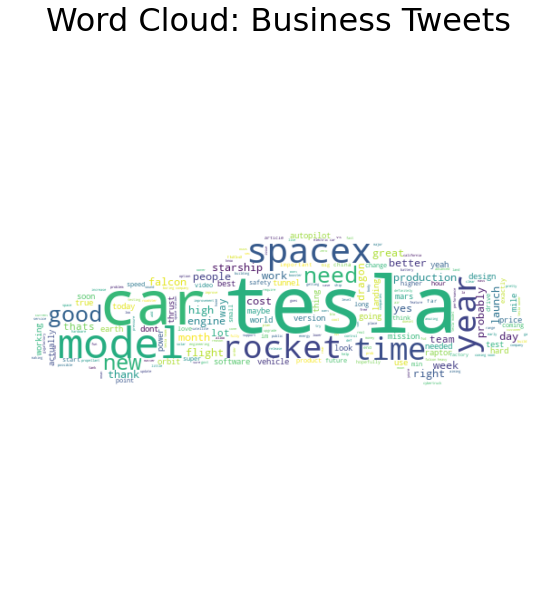

In [19]:
#Static Business Word Cloud 
wordcloud1 = WordCloud(
                          max_words=1000,
                          width=1600, 
                          height=800,
                          background_color = 'white',
                          stopwords = stopwords,
                          mask = custom_mask
                          ).generate(biz_words)
wordcloud1.generate_from_frequencies
plt.figure(figsize=(15,10))
plt.title('Word Cloud: Business Tweets', FontSize = 32, loc= 'center')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [20]:
#Business Tweets Word Cloud Interactive
interact(makingclouds, word_count=[200,500,1000,1500,2000,2500,3000],
         atitle=fixed('Word Cloud: Business Tweets'), text= fixed(biz_words))

interactive(children=(Dropdown(description='word_count', options=(200, 500, 1000, 1500, 2000, 2500, 3000), val…

<function __main__.makingclouds(word_count, atitle, text)>

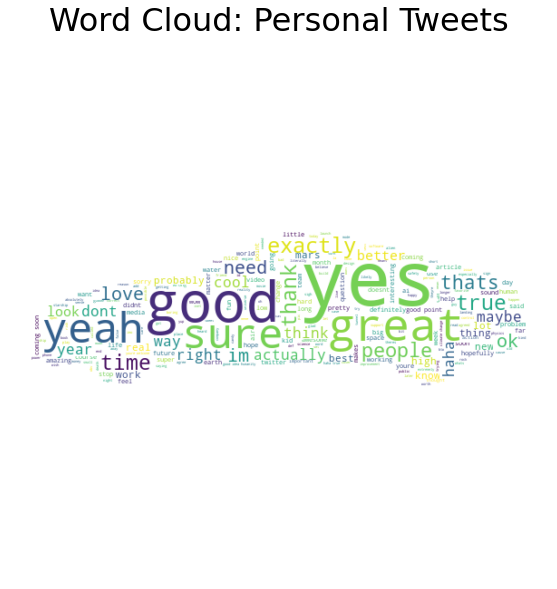

In [21]:
#Static Personal Word Cloud 
wordcloud2 = WordCloud(
                          max_words=1000,
                          width=1600, 
                          height=800,
                          background_color = 'white',
                          stopwords = stopwords,
                          mask = custom_mask
                          ).generate(per_words)
wordcloud2.generate_from_frequencies
plt.figure(figsize=(15,10))
plt.title('Word Cloud: Personal Tweets', FontSize = 32, loc= 'center')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [22]:
#Personal Tweets Word Cloud 
interact(makingclouds, word_count=[200,500,1000,1500,2000,2500,3000],
         atitle=fixed('Word Cloud: Personal Tweets'), text= fixed(per_words))

interactive(children=(Dropdown(description='word_count', options=(200, 500, 1000, 1500, 2000, 2500, 3000), val…

<function __main__.makingclouds(word_count, atitle, text)>

In [23]:
#### Seaborn visualization of Word Counts Business and Personal 

In [24]:
#Create stop words for bigrams and make into list 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
bigram_biz = list(ngrams(biz_words.split(),2))
bigram_per = list(ngrams(per_words.split(),2))

In [25]:
#add words that aren't in the NLTK stopwords list
new_stopwords = ['i', 'the', 'its', 'it', 'this', 'will', 'yes', 
                        'like', 'make', 'we', 'made', 'would', 'get', 'go',
                        'if', 'lot', 'im', 'dont', 'that','also','i']
new_stopwords_list = stop_words.union(new_stopwords)

#Function for Common words and use Count 
def mostCommonWords(words):
    #words = words.split()
    words = [w for w in words if w not in new_stopwords_list]
    words = Counter(words).most_common()
    return words

In [26]:
#Call Function
count_biz = mostCommonWords(bigram_biz)
count_per = mostCommonWords(bigram_per)

In [27]:
#Take top 30 Count 
count_biz_df = pd.DataFrame(count_biz).head(30)
count_per_df = pd.DataFrame(count_per).head(30)

In [28]:
count_biz_df = count_biz_df.rename(columns ={0:'Bigram Words', 1: 'Count'})
count_per_df = count_per_df.rename(columns ={0:'Bigram Words', 1: 'Count'})

In [29]:
count_biz_df
            
            
            

Bigram Words  Count
0   (model, 3)          160  
1   (model, s)          145  
2   (falcon, 9)         67   
3   (falcon, heavy)     46   
4   (s, x)              39   
5   (coming, soon)      38   
6   (tesla, model)      37   
7   (boring, company)   35   
8   (model, x)          35   
9   (space, station)    31   
10  (tesla, team)       29   
11  (tesla, owners)     24   
12  (years, ago)        24   
13  (end, year)         24   
14  (cape, canaveral)   24   
15  (upper, stage)      22   
16  (super, heavy)      20   
17  (solar, power)      20   
18  (spacex, team)      20   
19  (looks, like)       20   
20  (electric, cars)    18   
21  (tesla, solar)      17   
22  (6, months)         17   
23  (dual, motor)       17   
24  (2, 3)              16   
25  (model, y)          16   
26  (crew, dragon)      15   
27  (looks, good)       15   
28  (tesla, service)    15   
29  (tesla, autopilot)  14

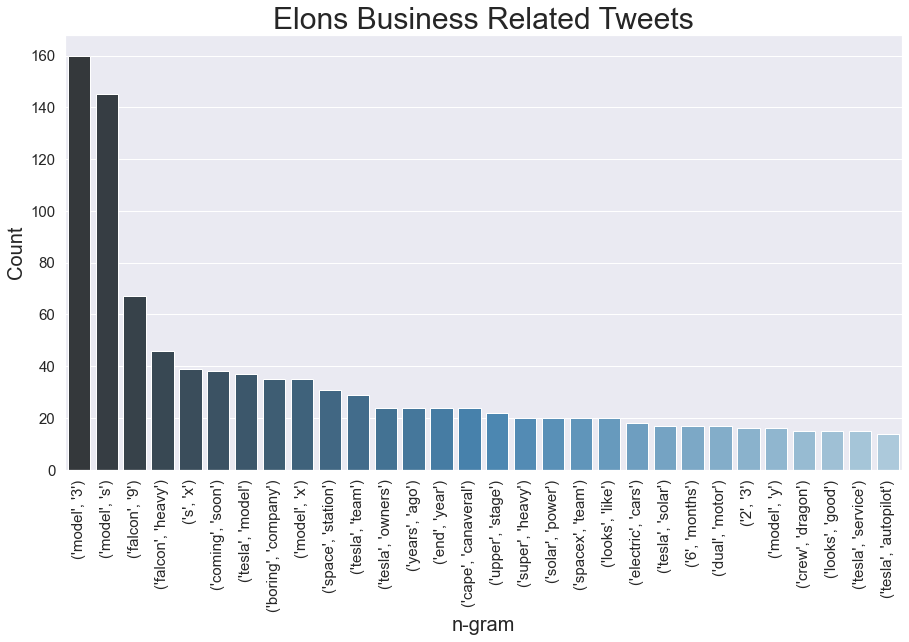

In [30]:
#Business Top 30 words
sns.set(style="darkgrid")

plt.figure(figsize = (15,8))
sns.barplot(count_biz_df['Bigram Words'], count_biz_df['Count'], palette="Blues_d")
plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('n-gram', fontsize = 20)
plt.title('Elons Business Related Tweets', fontsize = 30)
plt.show()



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128760 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


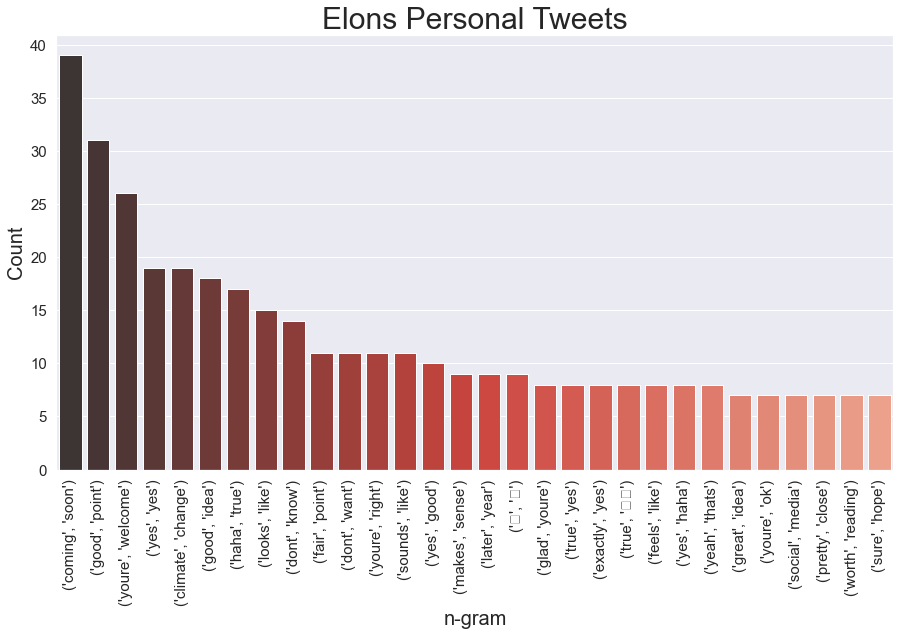

In [31]:
#Personal Top 30 Words 
sns.set(style="darkgrid")

plt.figure(figsize = (15,8))
sns.barplot(count_per_df['Bigram Words'], count_per_df['Count'], palette="Reds_d")
plt.xticks(rotation='vertical', fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('n-gram', fontsize = 20)
plt.title('Elons Personal Tweets', fontsize = 30)
plt.show()

In [32]:
#### Bokeh Emoji Count 

In [33]:
#Make emoji column into list 
emoji = "".join(list(itertools.chain.from_iterable(df.emoji)))

In [34]:
#Get rid of ',' and make it into dataframe for Bokeh Visualization 
stop_emoji = [',']
emoji = [w for w in emoji if w not in stop_emoji]
emoji_df = pd.DataFrame(Counter(emoji).most_common()).head(20)
emoji_df.rename(columns = {0:'emoji',1:'count'}, inplace = True)

In [35]:
#emoji Bokeh Visual 

emoji = list(emoji_df['emoji'])
counts = list(emoji_df['count'])

source = ColumnDataSource(data=dict(emoji=emoji, counts=counts))

p1 = figure(x_range=emoji, y_range=(0,200),  plot_width=600, plot_height=500, 
            title="Elons Favorite Emojis",
           toolbar_location='below', tools="pan,wheel_zoom,box_zoom,reset")


p1.vbar(x='emoji', top='counts', width=0.9, color = 'gold', source=source)
p1.title.align = 'center'
p1.xgrid.grid_line_color = None
p1.left[0].formatter.use_scientific = False
p1.add_tools(HoverTool(tooltips=[("Emoji", "@emoji"), ("Total Count", "@counts")]))

p1.title.text_font_size = '20pt'
p1.xaxis.axis_label="Emoji"
p1.xaxis.axis_label_text_font_size = "15pt"
p1.xaxis.major_label_text_font_size = "15pt"
p1.xaxis.axis_label_text_color = "black"
p1.yaxis.axis_label="Count"
p1.yaxis.axis_label_text_font_size = "15pt"
p1.yaxis.major_label_text_font_size = "15pt"
p1.yaxis.axis_label_text_color = "black"

tbsource1 = ColumnDataSource(emoji_df)

columns1 = [TableColumn(field = 'emoji', title = 'Emoji'),
          TableColumn(field = 'count', title = 'Count')]
data_table1 = DataTable(source = tbsource1, columns = columns1, width = 300, height = 300)

layout1 = row(p1, data_table1)

show(layout1)

In [36]:
#### Plotly Retweet Count, fav_count compound score and Close price 

In [37]:
import pandas_datareader as wb

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [38]:
ticker = 'TSLA'
stockDF = pd.DataFrame(wb.DataReader(ticker, data_source= 'yahoo',
                                     start = '12-01-2011', end = '6-30-2020'))

In [39]:
#Reset the index
stockDF = stockDF.reset_index()

In [40]:
#Change timestamp to datetime 
x = lambda a : a.date()

stockDF['Date'] = stockDF['Date'].apply(x)
stockDF.rename(columns = {'Date': 'date'}, inplace = True)

In [41]:
type(biztweets['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
#Change timestamp to datetime format 
biztweets['date'] = pd.to_datetime(biztweets['date'], unit='ms')
biztweets['date'] = pd.to_datetime(biztweets['date']).dt.date

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
#Change timestamp to datetime format 
personal['date'] = pd.to_datetime(personal['date'], unit='ms')
personal['date'] = pd.to_datetime(personal['date']).dt.date

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
#combine tweet data with financial data
biztweets = biztweets.merge(stockDF, how = 'left', on = 'date')

In [45]:
biztweets.to_json('biztweets.json')

In [46]:
#combine tweet data with financial data
personal = personal.merge(stockDF, how = 'left', on = 'date')

In [47]:
personal.to_json('personal.json')

In [48]:
#Plotly Scatter
fig = px.scatter(biztweets, x="compound", y="Adj Close", color="retweetCount",
                 size='favCount', hover_data=['Volume'])
fig.show()

In [49]:
#Plotly Scatter
fig = px.scatter(personal, x="compound", y="Adj Close", color="retweetCount",
                 size='favCount', hover_data=['Volume'])
fig.show()

In [50]:
#### Word2vec to visualize word embeddings 

In [51]:
#Word2vec of Personal and Business Tweets 
tweets = df[df['tweetType'] != 'None']
tweets = tweets[['clean_text']]
tokenized_tweet = tweets.clean_text.apply(word_tokenize)

In [52]:
#Create Word2Vec Model 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=3, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            seed = 77)



model_w2v.train(tokenized_tweet, total_examples= len(tweets['clean_text']), epochs=50)

(3096338, 3508500)

In [53]:
#Look at what's related to stock top 10 
model_w2v.wv.most_similar('stock', topn = 10)

[('bet', 0.5951718688011169),
 ('workers', 0.5928981304168701),
 ('chrysler', 0.5901843309402466),
 ('exclude', 0.5819636583328247),
 ('drinks', 0.5779492855072021),
 ('compensation', 0.5777837634086609),
 ('shorting', 0.5747488737106323),
 ('trademark', 0.5691045522689819),
 ('healthcare', 0.5682398080825806),
 ('wages', 0.5640444755554199)]

In [54]:
#Look at what's related to tesla top 10 
model_w2v.wv.most_similar('tesla', topn = 10)

[('teslamotors', 0.39569514989852905),
 ('trailer', 0.3899845480918884),
 ('king', 0.3796924948692322),
 ('item', 0.37581220269203186),
 ('exec', 0.3757961094379425),
 ('discussed', 0.3750617504119873),
 ('enhancements', 0.3702021539211273),
 ('latimes', 0.3699660003185272),
 ('snacks', 0.3666256070137024),
 ('stalls', 0.3654545843601227)]

In [55]:
#Create tsne visual by appending similar words and embedding to a list 
keys = ['tesla', 'car', 'stock', 'money', 
        'china', 'spacex', 'money', 'falcon', 'dollar',
       'market']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, embed in model_w2v.wv.most_similar(word, topn=7):
        words.append(similar_word)
        embeddings.append(model_w2v.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [56]:
#PCA to make a 3D into 2D
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

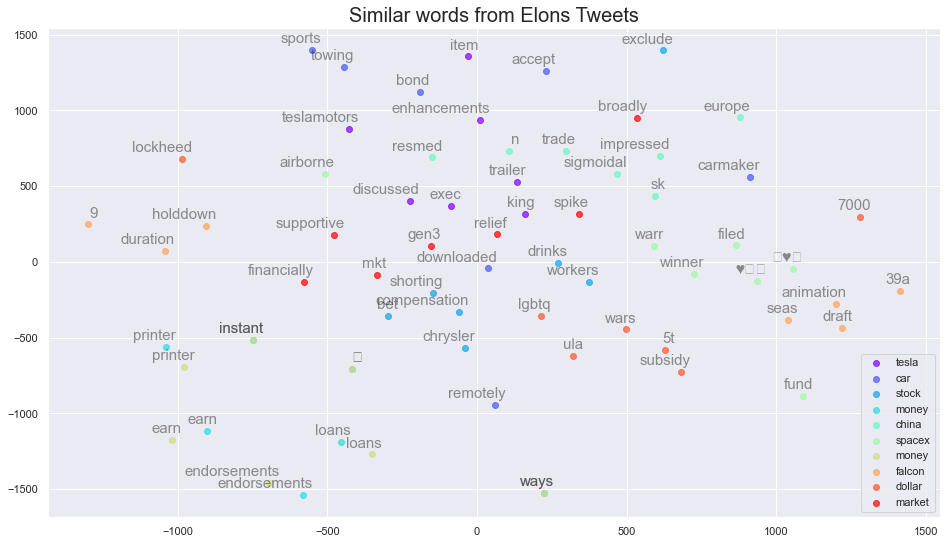

In [57]:
#Visualize word embedding 
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(10, 4),
                         textcoords='offset points', ha='right', va='bottom', size=15)
    plt.legend(loc=4)
    plt.title(title, fontsize = 20)
    plt.grid(True)
    plt.show()


tsne_plot_similar_words('Similar words from Elons Tweets', keys, 
                        embeddings_en_2d, word_clusters, 0.7)

In [58]:
#### Interactive box and whiskers for close price difference between tweetbiz and personal 

In [59]:
df = pd.read_json('data/elonDF.json')
df = df.dropna()

In [60]:
#Box and Whiskers 
y0 = df['Adj Close'].astype(np.int)
y1 = df['High'].astype(np.int)
y2 = df['retweetCount'].astype(np.int)
y3 = df['Low'].astype(np.int)
y4 = df['favCount'].astype(np.int)
y5 = df['compound']
y6 = df['Volume'].astype(np.int)

fig = go.Figure()
fig.add_trace(go.Box(y=y0, name='Adj Close',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=y1, name = 'High',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=y3, name = 'Low',
                marker_color = 'blue'))
fig.add_trace(go.Box(y=y2, name = 'Retweet Count',
                marker_color = 'gold'))
fig.add_trace(go.Box(y=y4, name = 'Fav Count',
                marker_color = 'purple'))
fig.add_trace(go.Box(y=y5, name = 'Compound Score',
                marker_color = 'pink'))
fig.add_trace(go.Box(y=y6, name = 'Volume',
                marker_color = 'green'))

fig.show()

In [61]:
#Where did the Highest Fav Count come from what was the tweet 
df[df['favCount'] >= 1690000]

date   favCount  retweetCount  tweetLen  \
2567 2020-03-06  1695892.0  334584.0      5.0        

                              tweet          tweetType  Business positive  \
2567  The coronavirus panic is dumb  Personal negative  0.0                 

      Business neutral  business negative  Personal positive  \
2567  0.0               0.0                0.0                 

      Personal neutral  Personal negative  compound   High        Low   Open  \
2567  0.0               1.0               -0.765     707.0  684.27002  690.0   

          Close      Volume  Adj Close dayOfWeek  
2567  703.47998  12662900.0  703.47998  Friday

In [62]:
#Where did the Highest Close come from what was the tweet 
df[df['Adj Close'] > 1025]

date  favCount  retweetCount  tweetLen  \
2661 2020-06-10  195695.0  14172.0       413.0      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 tweet  \
2661  Trèy Boucher, Great point. Many articles are retweeted based on headlines that don’t match the content., Actually, we’re on SN30 for Raptor, Sure. That’s long montage 🤣🤣, Wow, ❤️ the laser beam long exposure shots, Hundreds of improvements in manufacturability primarily (this is by far the hardest problem), mass down, thrust up, Isp up. Current improvement list continues past SN50. As the saying goes, it’s 1% inspiration & 99% perspiration …, Also, insulation of a deep cryogen( which I’d call anything that liquifies nitrogen aka 78% of air) is heavy & prone to heat leaks. H2 is hell., Tesla factory workplace safety is 5% better than industry average for manufacturers & improving fast, Important technical note: due to higher O/F of CH4 vs RP1 (oxygen is dense) & significant density increase of subcooled CH4 (plus no common dome insulation needed), plus cryo strength bump of CH4, tank mass of CH4/O2 stage is almost same as RP1/O2., We could never reach 380 Isp with RP/kerosene. CH4 has higher Isp potential on paper, but even better in practice. With CH4, you can reach >99% of max theoretical combustion efficiency, but RP is ~97% on a good day & requires desooting of turbines between flights., After which they are recycled, Tesla batteries are lasting much longer than 200k miles

In [63]:
#Where did the Highest Volume come from what was the tweet 
df[df['Volume'] == 60938800]

date  favCount  retweetCount  tweetLen  \
2539 2020-02-04  113812.0  5452.0        83.0       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tweet  \
2539  Have you tried a hydrophobic spray?, This is mainly for staffing up 4 production shifts for 24/7 operations, but engineers, supervisors & support personnel are certainly needed too. A super hardcore work ethic, talent for building things, common sense & trustworthiness are required, the rest we can train., Starship career day at the Stargate building (Boca Chica Blvd, TX) this Thursday from 3pm to 9pm!, Going max hardcore on design/production Starship here in Boca. It’s awesome! Feels a bit like a Mars simulator.   

                                                                     tweetType  \
2539  Personal neutral, Business positive, Business neutral, Business positive   

      Business positive  Business neutral  business negative  \
2539  2.0                1.0               0.0                 

      Personal positive  Personal neutral  Personal negative  compound  \
2539  0.0                1.0               0.0                0.9847     

           High         Low        Open       Close      Volume   Adj Close  \
2539  968.98999  833.880005  882.960022  887.059998  60938800.0  887.059998   

     dayOfWeek  
2539  Tuesday

In [64]:
#Where did the Highest CompoundScore come from what was the tweet 
df[df['compound'] > 0.9982]

date  favCount  retweetCount  tweetLen  \
1943 2018-05-22  237467.0  14370.0       740.0      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [65]:
import plotly.express as px

In [66]:
df = pd.read_json('data/elonDF.json')
columns = ['Business positive', 'Business neutral', 'business negative',
       'Personal positive', 'Personal neutral', 'Personal negative']
df[columns] = df[columns].fillna(0)

In [67]:
fig = px.sunburst(df, path = ['Business positive', 'Business neutral', 'business negative',
       'Personal positive', 'Personal neutral', 'Personal negative'], values = 'Adj Close')

fig.show()

# Financial Visualizaton

In [ ]:
#Moving average divergence cross over
#MACD over signal line good time to buy 
#below good time to sell 
#Description
##This program uses the Moving Average Convergence/Divergence (MACD) cross over
### to det4ermine when to buy and sell stock

In [73]:
df1 = pd.read_json('data/tslaStock.json')

In [77]:
df1.tail()

date         High          Low         Open        Close    Volume  \
2153 2020-06-24  1000.880005  953.140015   994.109985   960.849976   10959600   
2154 2020-06-25  985.979980   937.150024   954.270020   985.979980   9254500    
2155 2020-06-26  995.000000   954.869995   994.780029   959.739990   8854900    
2156 2020-06-29  1010.000000  948.520020   969.010010   1009.349976  9026400    
2157 2020-06-30  1087.689941  1003.729980  1006.500000  1079.810059  16918500   

        Adj Close  
2153  960.849976   
2154  985.979980   
2155  959.739990   
2156  1009.349976  
2157  1079.810059

In [78]:
#Calculate the MACD and single line indicators
#Calculate the short term exponential moving average (EMA)
ShortEMA = df1['Adj Close'].ewm(span = 12, adjust = False).mean()
#Calculate the llong term exponential moving average (EMA)
LongEMA = df1['Adj Close'].ewm(span = 26, adjust = False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#calculate the signal line
signal = MACD.ewm(span = 9, adjust = False).mean()

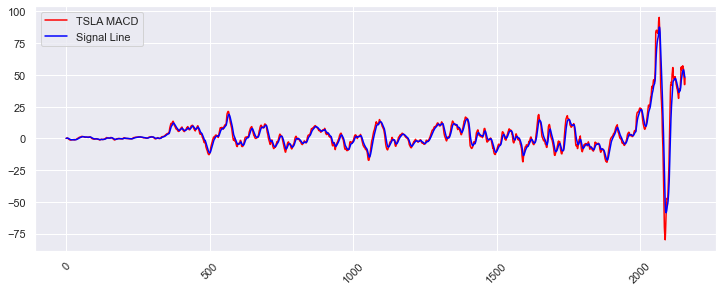

In [79]:
#Plot the chart
plt.figure(figsize = (12.2,4.5))
plt.plot(df1.index, MACD, label = 'TSLA MACD', color = 'red')
plt.plot(df1.index, signal, label = 'Signal Line', color = 'blue')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left')
plt.show()

In [80]:
#Create a new column called MACD
df1['MACD'] = MACD
df1['Signal Line'] = signal
df1.head()

date       High        Low       Open      Close   Volume  Adj Close  \
0 2011-12-01  33.990002  31.980000  32.570000  32.599998  1030200  32.599998   
1 2011-12-02  33.689999  32.400002  32.830002  33.299999  802800   33.299999   
2 2011-12-05  35.000000  33.430000  33.529999  34.419998  1160100  34.419998   
3 2011-12-06  34.980000  34.029999  34.200001  34.869999  951800   34.869999   
4 2011-12-07  34.889999  33.799999  34.630001  34.189999  674300   34.189999   

       MACD  Signal Line  
0  0.000000  0.000000     
1  0.055841  0.011168     
2  0.188298  0.046594     
3  0.325828  0.102441     
4  0.375620  0.157077

In [81]:
#Create a function to signal when to buy and sell asset
def buy_sell(signal):
  buy = []
  sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(signal['Adj Close'][i])
        flag = 1
      else: 
        buy.append(np.nan)

    elif signal['MACD'][i] < signal['Signal Line'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(signal['Adj Close'][i])
        flag = 0
      else: 
        sell.append(np.nan)
    
    else:
      buy.append(np.nan)
      sell.append(np.nan)
      
  return (buy, sell)

In [82]:
#Create buy and sell column 
a = buy_sell(df1)
df1['Buy_Signal_Price'] = a[0]
df1['Sell_Signal_Price'] = a[1]

In [90]:
df1['Buy_Signal_Price']

0      NaN       
1       33.299999
2      NaN       
3      NaN       
4      NaN       
        ..       
2153   NaN       
2154   NaN       
2155   NaN       
2156   NaN       
2157   NaN       
Name: Buy_Signal_Price, Length: 2158, dtype: float64

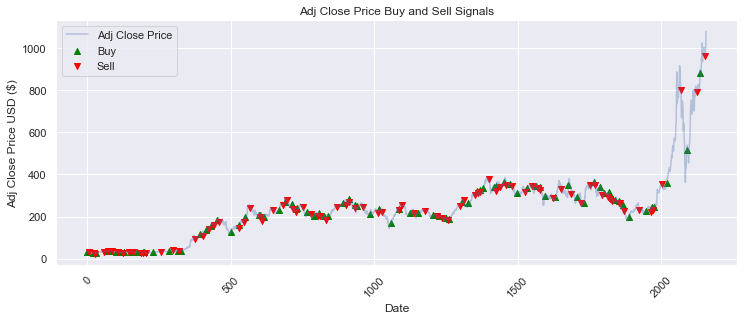

In [86]:
#Visually show the stock buy and sell signals
plt.figure(figsize = (12.2, 4.5))
plt.scatter(df1.index, df1['Buy_Signal_Price'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
plt.scatter(df1.index, df1['Sell_Signal_Price'], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
plt.plot(df1['Adj Close'], label = 'Adj Close Price', alpha = 0.35)
plt.title('Adj Close Price Buy and Sell Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [103]:
df2 = df1.set_index('date')

In [110]:
#Plotly Scatter
fig = go.Figure()

fig.add_trace(go.Scatter(x=df2.index, y=df2['Adj Close'], name="Adjusted Close Price",
                     line_color='light blue', opacity = 0.5))

fig.add_trace(go.Scatter(mode = "markers", x = df2.index, 
                         y = df2['Buy_Signal_Price'], marker_symbol = 'triangle-up',
                        marker_color = "green", marker_size = 10, name = 'Buy'))
fig.add_trace(go.Scatter(mode = "markers", x = df2.index, 
                         y = df2['Sell_Signal_Price'], marker_symbol = 'triangle-down',
                        marker_color="red", marker_size = 10, name = 'Sell'))
fig.update_layout(title_text='Tesla Model Price Prediction', width=1000,
height=600, xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
#RSI

In [111]:
#Prepare the data to calculate the RSI

#Get the difference in price from the previous day
delta = df1['Adj Close'].diff(1)

delta

0      NaN       
1       0.700001 
2       1.119999 
3       0.450001 
4      -0.680000 
          ...    
2153   -40.930054
2154    25.130005
2155   -26.239990
2156    49.609985
2157    70.460083
Name: Adj Close, Length: 2158, dtype: float64

In [112]:
#Get rid of NAN
delta = delta.dropna()
delta

1       0.700001 
2       1.119999 
3       0.450001 
4      -0.680000 
5      -3.299999 
          ...    
2153   -40.930054
2154    25.130005
2155   -26.239990
2156    49.609985
2157    70.460083
Name: Adj Close, Length: 2157, dtype: float64

In [113]:
#Get the positive Gains (up) and get the negative gains (down)
up = delta.copy()
down = delta.copy()

#up only has positive and down only has negative
up[up<0] = 0
down[down>0] = 0

In [114]:
#Get the time Period
period = 14
#Calculate the average gain and the average loss
AVG_Gain = up.rolling(window = 14).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [115]:
#Calculate the RSI

#Calculate the Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
#Calculate the Relative Strength Index (RSI)
RSI = 100.0 -(100.0/(1.0 +RS))

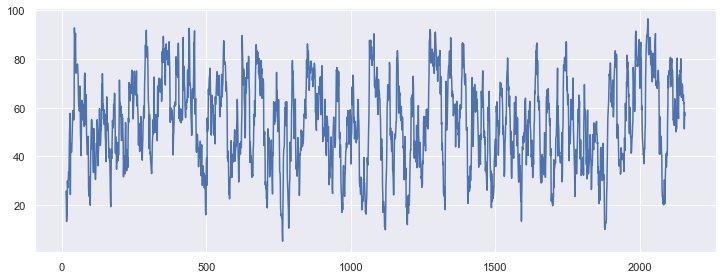

In [116]:
#Show the RSI Visually
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

In [133]:
#put it all together 

#Create a new data frame
new_df = pd.DataFrame()

new_df['Adj Close'] = df1['Adj Close']
new_df['RSI'] = RSI
new_df['date'] = df1['date']
new_df = new_df.set_index('date')

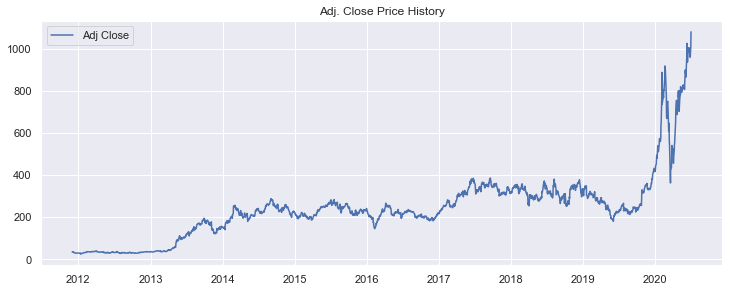

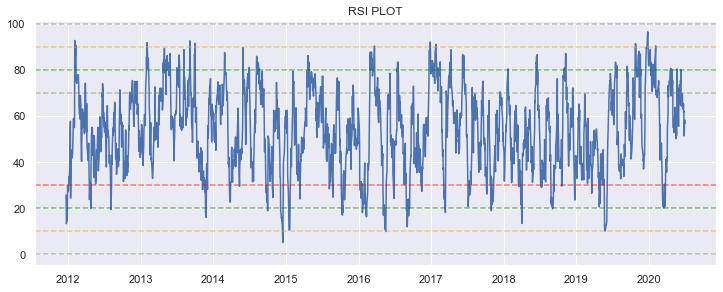

In [135]:
#Visually show the adjusted close price and RSI

#Plot the adjusted Close price
plt.figure(figsize = (12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

#Plot the corresponding RSI values and the significant levels
plt.figure(figsize = (12.2,4.5))
plt.title('RSI PLOT')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0,linestyle = '--', alpha = 0.5, color = 'gray')
plt.axhline(10,linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(20,linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(30,linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(70,linestyle = '--', alpha = 0.5, color = 'gray')
plt.axhline(80,linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(90,linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(100,linestyle = '--', alpha = 0.5, color = 'gray')
plt.show()

In [159]:
#Plotly Scatter
fig = go.Figure()
fig.add_trace(go.Scatter(x=new_df.index, y=new_df['RSI'], name="RSI",
                     line_color='light blue', opacity = 0.7))

fig.add_trace(go.Scatter(
    x=new_df.index,
    y=[0] * len(new_df),
    mode='lines', line = dict(shape = 'linear', color = 'gray', dash = 'dot'), 
    opacity = 0.5))

fig.add_trace(go.Scatter(
    x=new_df.index,
    y=[10] * len(new_df),
    mode='lines', line = dict(shape = 'linear', color = 'orange', dash = 'dot'), 
    opacity = 0.5))

fig.add_trace(go.Scatter(
    x=new_df.index,
    y=[20] * len(new_df),
    mode='lines', line = dict(shape = 'linear', color = 'green', dash = 'dot'), 
    opacity = 0.5))

fig.add_trace(go.Scatter(
    x=new_df.index,
    y=[30] * len(new_df),
    mode='lines', line = dict(shape = 'linear', color = 'red', dash = 'dot'), 
    opacity = 0.5))

fig.add_trace(go.Scatter(
    x=new_df.index,
    y=[70] * len(new_df),
    mode='lines', line = dict(shape = 'linear', color = 'gray', dash = 'dot'), 
    opacity = 0.5))

fig.add_trace(go.Scatter(
    x=new_df.index,
    y=[80] * len(new_df),
    mode='lines', line = dict(shape = 'linear', color = 'green', dash = 'dot'), 
    opacity = 0.5))

fig.add_trace(go.Scatter(
    x=new_df.index,
    y=[90] * len(new_df),
    mode='lines', line = dict(shape = 'linear', color = 'orange', dash = 'dot'), 
    opacity = 0.5))

fig.add_trace(go.Scatter(
    x=new_df.index,
    y=[100] * len(new_df),
    mode='lines', line = dict(shape = 'linear', color = 'gray', dash = 'dot'), 
    opacity = 0.5))

fig.update_layout(title_text='Tesla Model Price Prediction', width=1000,
height=600, xaxis_rangeslider_visible=True)

fig.show()

In [119]:
#Dual Moving Average CrossOver

In [120]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()

SMA30['Adj Close'] = df1['Adj Close'].rolling(window =30).mean()
SMA30

Adj Close
0    NaN        
1    NaN        
2    NaN        
3    NaN        
4    NaN        
...   ..        
2153  897.270003
2154  903.770669
2155  908.984334
2156  915.990334
2157  924.863003

[2158 rows x 1 columns]

In [121]:
#Create simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = df1['Adj Close'].rolling(window = 100).mean()

SMA100

Adj Close
0    NaN        
1    NaN        
2    NaN        
3    NaN        
4    NaN        
...   ..        
2153  745.388501
2154  747.448301
2155  748.175101
2156  750.921600
2157  754.230101

[2158 rows x 1 columns]

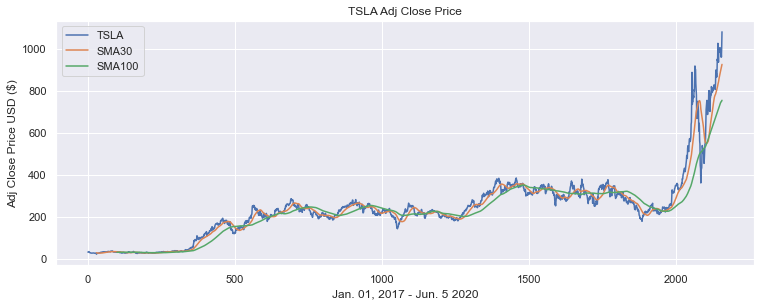

In [122]:
#Visualize the Data
#anytime sma30 crosses the sma100 it would be a signal to buy 
plt.figure(figsize = (12.5, 4.5))
plt.plot(df1['Adj Close'], label = 'TSLA')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('TSLA Adj Close Price')
plt.xlabel('Jan. 01, 2017 - Jun. 5 2020')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

In [123]:
#Create a new Dataframe to store all the data
df2 = pd.DataFrame()
df2['TSLA'] = df1['Adj Close']
df2['SMA30'] = SMA30['Adj Close']
df2['SMA100'] = SMA100['Adj Close']
df2

TSLA       SMA30      SMA100
0     32.599998   NaN         NaN        
1     33.299999   NaN         NaN        
2     34.419998   NaN         NaN        
3     34.869999   NaN         NaN        
4     34.189999   NaN         NaN        
...         ...    ..          ..        
2153  960.849976   897.270003  745.388501
2154  985.979980   903.770669  747.448301
2155  959.739990   908.984334  748.175101
2156  1009.349976  915.990334  750.921600
2157  1079.810059  924.863003  754.230101

[2158 rows x 3 columns]

In [124]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if df2['SMA30'][i] > df2['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(df2['TSLA'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif df2['SMA30'][i] < df2['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(df2['TSLA'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [125]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(df2)
df2['Buy_Signal_Price'] = buy_sell[0]
df2['Sell_Signal_Price'] = buy_sell[1]

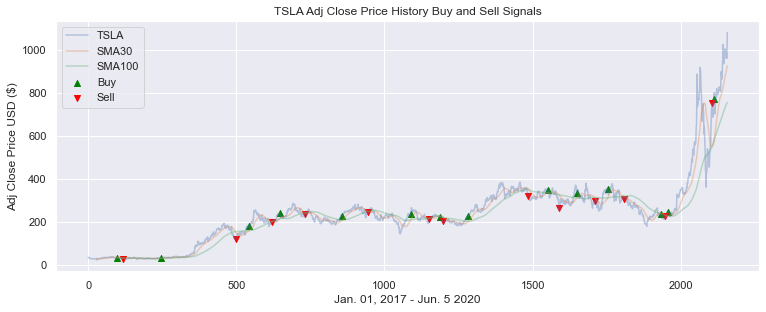

In [126]:
#Visualize the Data and the strategy to buy and sell the stock
plt.figure(figsize = (12.6, 4.6))
plt.plot(df2['TSLA'], label = 'TSLA', alpha = 0.35)
plt.plot(df2['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(df2['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(df2.index, df2['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(df2.index, df2['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('TSLA Adj Close Price History Buy and Sell Signals')
plt.xlabel('Jan. 01, 2017 - Jun. 5 2020')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

TSLA       SMA30      SMA100  Buy_Signal_Price  Sell_Signal_Price
0     32.599998   NaN         NaN         NaN               NaN               
1     33.299999   NaN         NaN         NaN               NaN               
2     34.419998   NaN         NaN         NaN               NaN               
3     34.869999   NaN         NaN         NaN               NaN               
4     34.189999   NaN         NaN         NaN               NaN               
...         ...    ..          ..          ..                ..               
2153  960.849976   897.270003  745.388501 NaN               NaN               
2154  985.979980   903.770669  747.448301 NaN               NaN               
2155  959.739990   908.984334  748.175101 NaN               NaN               
2156  1009.349976  915.990334  750.921600 NaN               NaN               
2157  1079.810059  924.863003  754.230101 NaN               NaN               

[2158 rows x 5 columns]

In [168]:
#Plotly Scatter
fig = go.Figure()

fig.add_trace(go.Scatter(x=df2.index, y=df2['TSLA'], name="Adjusted Close Price",
                     line_color='light blue', opacity = 0.35))
fig.add_trace(go.Scatter(x=df2.index, y=df2['SMA30'], name="Simple Moving Average 30 day",
                     line_color='gold', opacity = 0.35))
fig.add_trace(go.Scatter(x=df2.index, y=df2['SMA100'], name="Simple Moving Average 100 day",
                     line_color='green', opacity = 0.35))

fig.add_trace(go.Scatter(mode = "markers", x = df2.index, 
                         y = df2['Buy_Signal_Price'], marker_symbol = 'triangle-up',
                        marker_color = "green", marker_size = 10, name = 'Buy'))
fig.add_trace(go.Scatter(mode = "markers", x = df2.index, 
                         y = df2['Sell_Signal_Price'], marker_symbol = 'triangle-down',
                        marker_color="red", marker_size = 10, name = 'Sell'))
fig.update_layout(title_text='Tesla Dual Moving Average CrossOver', width=1000,
height=600, xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
#Fibonaci
#Renko
#ATR Bollinger Band 
#Change technical indicators to interactive with plotly 

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
df5 = df1.loc[2150:,['Adj Close', 'High', 'Low']]

In [ ]:
# Plot the price series
fig, ax = plt.subplots()
ax.plot(df5['Adj Close'])

# Define minimum and maximum price points
price_min = df5['Adj Close'].min()
price_max = df5['Adj Close'].max()

# Fibonacci Levels considering original trend as upward move
diff = price_max - price_min
level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

print("Level", "Price")
print("0 ", price_max)
print("0.236", level1)
print("0.382", level2)
print("0.618", level3)
print("1 ", price_min)

ax.axhspan(level1, price_min, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(price_max, level3, alpha=0.5, color='powderblue')

plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc=2)
plt.show()

In [169]:
#Technical Indicators are mathematical calculations based on historical price, volume or open interest information to predict
#asset price direction 
#popular techinical indicators include
#MACD Moving average convergence divergence
#Bollinger Bands
#RSI: Relative Strength Index
#ADX: Average Directional Index
#Super Trend
#Renko Chars 



In [170]:
#MACD
#it is a trend following momentum indicator which is calcualted by taking the difference of two moving averages of an asset price
# 12 period Moving Average and 26 period moving average
#A signal line is also calculated which is agian a moving average typically 9 period of the MACD line calculated as per
#above step
#MACD line cutting the signal line from below signals bullish period and the former cutting the latter from above signals
#bearish period.  This is the cross over strategy 
#Many false positives espeically during sideways market
#Suggested that this indicator be used in conjunction with other indicators 

In [ ]:
#MACD
#It is a trend following momentum indicator which is calculated by taking the difference of two moving averages of an 
#asset price (typically 12 period and 26 period MA)

#A signal line is also calculated which is again a moving average (typically 9 period) of the MACD line calculated as per the
#above step

#MACD line cutting the signal line from below signals bullish period and the former cutting the latter from above
#signal bearish period.  This is called a cross over strategy

#Many false positives- espeically during sideway markets

#Suggested that this indicator be used in conjunction with the other indicators

#lagging indicator - trails behind the actual price action 